In [2]:
import numpy as np
from numpy.fft import fft, ifft, ifftshift
from scipy import signal
import matplotlib.pyplot as plt


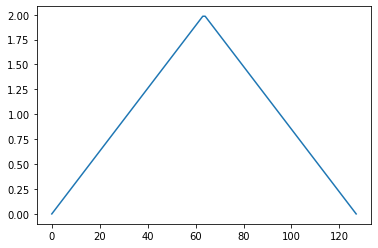

In [28]:
L = 128
t = np.linspace(0, 1, L)
triangle = signal.sawtooth(2 * np.pi * t, 0.5) + 1
plt.plot(triangle)

In [29]:
filterLength = 5
h = np.ones(filterLength)/filterLength

## Gaussian noise

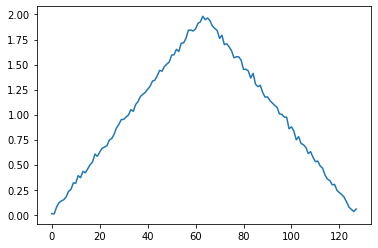

In [30]:
noise = 0.02*np.random.normal(loc=0, scale=1, size=t.shape)
y = np.convolve(triangle, h, mode='same') + noise
plt.plot(y)

In [31]:
Py = np.sum(np.square(y))
Pn = np.sum(np.square(noise))
SNR = 10*np.log10(Py/Pn)
print(SNR)

34.68684892079509


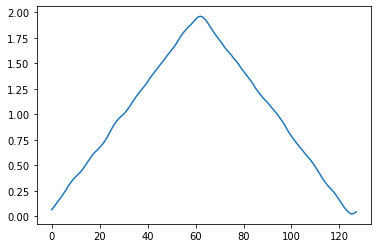

In [32]:
def deconvolve(y, h, lambd):
    d = np.array([1, -1])
    D = fft(d, n=L)
    H = fft(h, n=L)
    g = np.conj(H)/(H*np.conj(H) + lambd*(D*np.conj(D)))
    Y = fft(y)
    x = ifft(g*Y)
    return x.real
restoredX = deconvolve(y, h, 1)

plt.plot(restoredX)

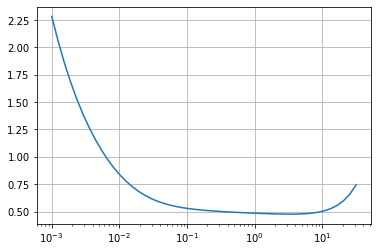

In [70]:
lambdas = np.logspace(-3, 1.5)
error = np.zeros(len(lambdas))
for i,l in enumerate(lambdas):
    restoredValue = deconvolve(y, h, l)
    error[i] = np.sum(np.square(restoredValue - triangle))
plt.plot(lambdas, error)
plt.semilogx()
plt.grid()

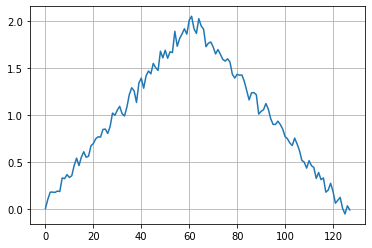

In [76]:
xlow = deconvolve(y, h, 0.01)
plt.plot(xlow)
plt.grid()

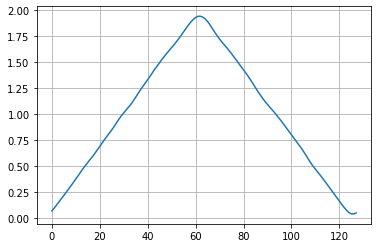

In [77]:
xlow = deconvolve(y, h, 3)
plt.plot(xlow)
plt.grid()

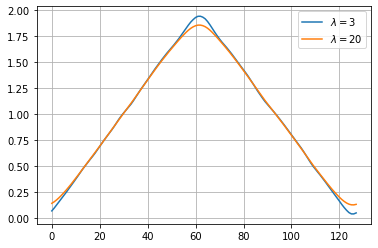

In [90]:
xlow = deconvolve(y, h, 3)
xhigh = deconvolve(y, h, 20)
plt.plot(xlow, label='$\lambda=3$')
plt.plot(xhigh,label='$\lambda=20$')
plt.legend()
plt.grid()

## Simulated quantification error

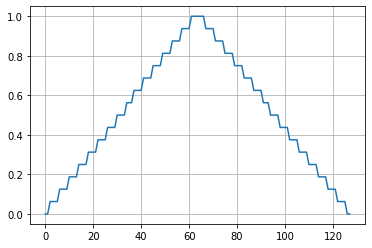

In [39]:
resolution = 4
clean_y = np.convolve(triangle, h, mode='same')
normalized_triangle = clean_y/np.max(clean_y)
digital_triangle_curve = np.round(normalized_triangle*(2**resolution))/2**resolution
plt.plot(digital_triangle_curve)
plt.grid()

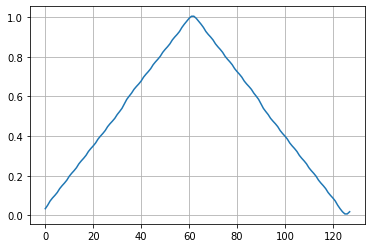

In [42]:
restored_analog_triangle = 2*deconvolve(digital_triangle_curve, h, 1)
plt.plot(restored_analog_triangle)
plt.grid()

Signal to noise ratio

In [41]:
print(np.sum(np.square(restored_analog_triangle - triangle)))

0.5796967586720528


## Extension to the 2D case

In [45]:
import cv2 as cv

In [46]:
img_grayscale = cv.imread('../samples/cameraman.jpg',0)
cv.imshow('graycsale image',img_grayscale)
